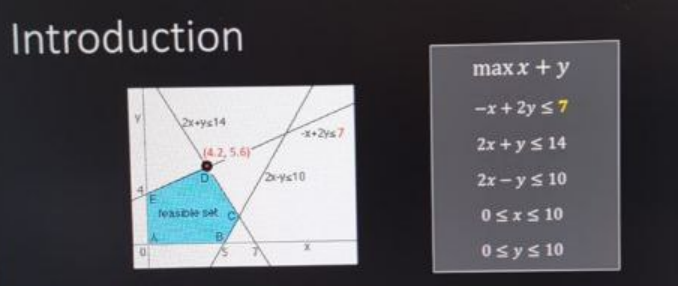

In [20]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import numpy as np
import pandas as pd


In [21]:
# Create a model instance
model = pyo.ConcreteModel()

# Define variables
model.x = pyo.Var(within=Integers, bounds=(0, 10))
model.y = pyo.Var(bounds=(0, 10))
x = model.x
y = model.y

# Define constraints
model.C1 = pyo.Constraint(expr= -x + 2*y <= 7)
model.C2 = pyo.Constraint(expr= 2*x + y <= 14)
model.C3 = pyo.Constraint(expr= 2*x - y <= 10)

# Define objective
model.obj = pyo.Objective(expr= x + y, sense=maximize)

# Solve the model
opt = SolverFactory('cplex')
# opt = SolverFactory('cbc')
# opt = SolverFactory('gurobi')
# opt = SolverFactory('ortools')
opt.solve(model)

# Print the solution
model.pprint()

x_value = pyo.value
y_value = pyo.value

print(f"x = {x_value(x)}")
print(f"y = {y_value(y)}")

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   4.0 :    10 : False : False : Integers
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   5.5 :    10 : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : x + y

3 Constraint Declarations
    C1 : Size=1, Index=None, Active=True
        Key  : Lower : Body      : Upper : Active
        None :  -Inf : - x + 2*y :   7.0 :   True
    C2 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x + y :  14.0 :   True
    C3 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :  -Inf : 2*x - y :  10.0 :   True

6 Declarations: x y C1 C2 C3 obj
x = 4.0
y = 5.5


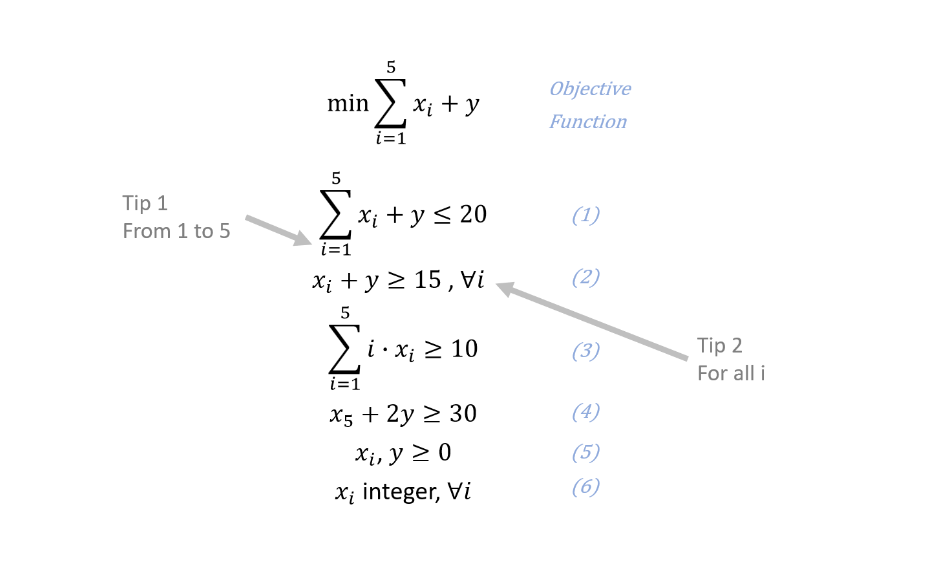

In [22]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import numpy as np
import pandas as pd
import time

In [24]:
# Create a model instance
model = pyo.ConcreteModel()

# Define variables
model.x = pyo.Var(range(1,6), within=Integers, bounds=(0, None))
model.y = pyo.Var(bounds=(0, None))
x = model.x
y = model.y

# Define constraints
model.C1 = pyo.Constraint(expr= sum([x[i] for i in range(1,6)]) + y <= 20)
model.C2 = pyo.ConstraintList()
for i in range(1,6):
    model.C2.add(expr = x[i]+y>=15)
model.C3 = pyo.Constraint(expr= sum([i*x[i] for i in range(1,6)]) >= 10)
model.C4 = pyo.Constraint(expr= x[5] + 2*y >= 30)


# Define objective
model.obj = pyo.Objective(expr= sum([x[i] for i in range(1,6)]) + y, sense=minimize)

begin = time.time()
# Solve the model
opt = SolverFactory('cplex')
# opt = SolverFactory('cbc')
# opt = SolverFactory('gurobi')
# opt = SolverFactory('ortools')
opt.solve(model)
time_elapsed = time.time() - begin

# Print the solution
model.pprint()

print(f"Time elapsed: {time_elapsed} seconds")

for i in range(1,6):
    print('x[%i] = %i' % (i, pyo.value(x[i])))
print('y = %.2f' % pyo.value(y))
print('Obj = ', pyo.value(model.obj))

2 Set Declarations
    C2_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {1, 2, 3, 4, 5}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {1, 2, 3, 4, 5}

2 Var Declarations
    x : Size=5, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   0.0 :  None : False : False : Integers
          2 :     0 :   0.0 :  None : False : False : Integers
          3 :     0 :   0.0 :  None : False : False : Integers
          4 :     0 :   0.0 :  None : False : False : Integers
          5 :     0 :   2.0 :  None : False : False : Integers
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  15.0 :  None : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sen